In [33]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [34]:
df = pd.read_csv("data/hitters.csv").rename(columns=lambda col: col.lower()).dropna(subset="salary")
X = df.drop("salary", axis="columns").select_dtypes("number")
y = df["salary"]

In [35]:
y_train, y_test, X_train, X_test, = train_test_split(y, X, random_state=42)

In [39]:
alphas = np.linspace(1, 2000, 100)
coefs = []
for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    coefs.append(model.coef_)



/Users/edwardkrueger/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.572e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
/Users/edwardkrueger/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.665e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
/Users/edwardkrueger/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

In [40]:
X_train.columns

Index(['atbat', 'hits', 'hmrun', 'runs', 'rbi', 'walks', 'years', 'catbat',
       'chits', 'chmrun', 'cruns', 'crbi', 'cwalks', 'putouts', 'assists',
       'errors'],
      dtype='object')

<Axes: >

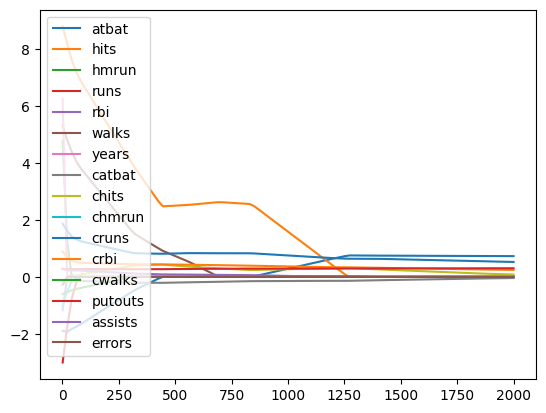

In [41]:
pd.DataFrame(index=alphas, data=coefs, columns=X_train.columns).plot()